In [ ]:
# Scratch
# Augmentation
# drop out

In [ ]:
#import os
#!mkdir complete_data
#!mkdir small_data

In [ ]:
#complete_data_dir = "complete_data"
#small_data_dir = "small_data"

##Loading the IMDB data for use with an Embedding layer

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17473536/17464789 [==============================] - 0s 0us/step


##Using an Embedding layer and classifier on the IMDB data

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense,Embedding
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6740 - acc: 0.6112 - val_loss: 0.6328 - val_acc: 0.6874
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5541 - acc: 0.7459 - val_loss: 0.5341 - val_acc: 0.7276
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4658 - acc: 0.7890 - val_loss: 0.5047 - 

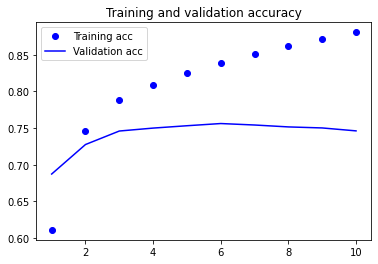

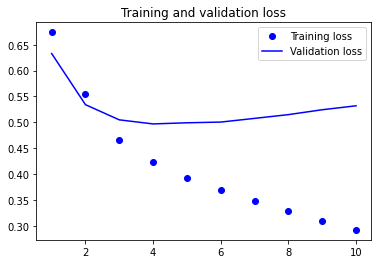

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#Pre-trained

##Labeling of the raw IMDB data

In [ ]:
import os
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
import os
imdb_dir =  "/content/drive/MyDrive/aclImdb"
train_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
    if label_type == 'neg':
      labels.append(0)
    else:
      labels.append(1)

KeyboardInterrupt: ignored

##Tokenizing the text of the raw IMDB data

1. fit_on_texts
2. texts_to_sequences
3. texts_to_matrix
4. sequences_to_matrix
5. document_count
6. word_counts



*   The word_count shows the number of times words occur in the text corpus passed to the Keras tokenizer class model. In our example, the word ‘machine’ has occurred 2 times, ‘learning’ 3 times, and so on.
*   The word_index assigns a unique index to each word present in the text. This unique integer helps the model during training purposes.
*   The word_index assigns a unique index to each word present in the text. This unique integer helps the model during training purposes.






In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np


maxlen = 100
training_samples = 20
validation_samples = 1000
max_words = 10000


tokenizer = Tokenizer(num_words=max_words)
print(tokenizer)
tokenizer.fit_on_texts(texts)
print(tokenizer)
sequences = tokenizer.texts_to_sequences(texts)
print(sequences)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
print(data)
print(data[0])
labels = np.asarray(labels)
print(labels)
print(labels[0])
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
print(indices)
np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 72633 unique tokens.
[[  24 1431    8 ...    1  295  326]
 [   0    2  139 ... 2927    9  238]
 [  14 1936   88 ... 1859    5  103]
 ...
 [  33   10   26 ...    8   44  588]
 [ 177  305   39 ...    4 4995  141]
 [3394   64  178 ...    3    2  435]]
[  24 1431    8    1  295  326    3    1  201 1531  221    8    1  295
  326   13   57  488    9  600    1 1012  907    8    1  208    3 1127
    1 4326    6    6  384 5123   12  647 3172   13    2  106   14  239
    1 5495 4447  135   23  265   11    8   54 2253   38   11  135   23
   75  622    8  668  209 2478    8   88  409    1  208    7   32   71
  117   34    1   97   10 2096   66    4  157  917 3636   79 1002    7
   26    4   59 3193    8    1  208 1133  326    3  406 1921    8    1
  295  326]
[0 0 0 ... 1 1 1]
0
Shape of data tensor: (21406, 100)
Shape of label tensor: (21406,)
[    0     1     2 ... 21403 21404 21405]


##Parsing the GloVe word-embeddings file

In [ ]:
glove_dir = '/content/drive/MyDrive/glove.6B'
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))

embeddings_index = {}

for line in f:
  values = line.split()
  print(values)
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Output hidden; open in https://colab.research.google.com to view.

##Preparing the GloVe word-embeddings matrix

In [ ]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

NameError: ignored

##Model definition

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

##Loading pretrained word embeddings into the Embedding layer

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

## Compiling & Learning

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.7582 - acc: 0.4500 - val_loss: 3.9416 - val_acc: 0.7890
Epoch 2/10
1/1 [==============================] - 0s 106ms/step - loss: 3.7866 - acc: 0.7500 - val_loss: 1.0812 - val_acc: 0.2930
Epoch 3/10
1/1 [==============================] - 0s 168ms/step - loss: 0.0524 - acc: 1.0000 - val_loss: 0.5767 - val_acc: 0.7800
Epoch 4/10
1/1 [==============================] - 0s 182ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.5758 - val_acc: 0.7800
Epoch 5/10
1/1 [==============================] - 0s 128ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.5767 - val_acc: 0.7810
Epoch 6/10
1/1 [==============================] - 0s 126ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.5786 - val_acc: 0.7810
Epoch 7/10
1/1 [==============================] - 0s 188ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.5806 - val_acc: 0.7800
Epoch 8/10
1/1 [==============================] - 0s 115ms/step - loss: 0.0013 - acc: 1.0000 

##Plotting

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

##Training the same model without pretrained word embeddings

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


NameError: ignored

## Compiling & Learning

In [ ]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_data=(x_val, y_val))

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()